In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("rice.xlsx")

In [3]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


<Axes: xlabel='Class', ylabel='count'>

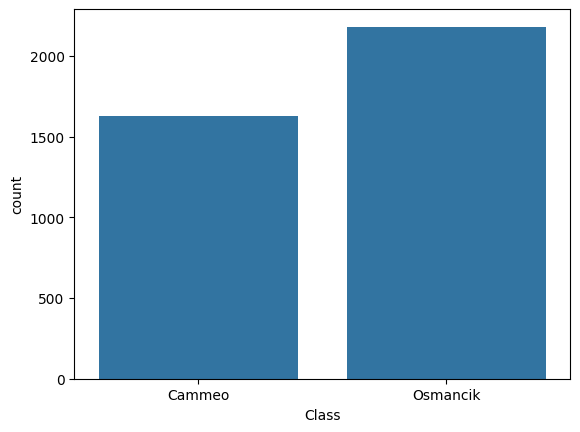

In [4]:
sns.countplot(x="Class",data=df)

In [6]:
df["Class"].value_counts()

Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64

<Axes: xlabel='Area', ylabel='Perimeter'>

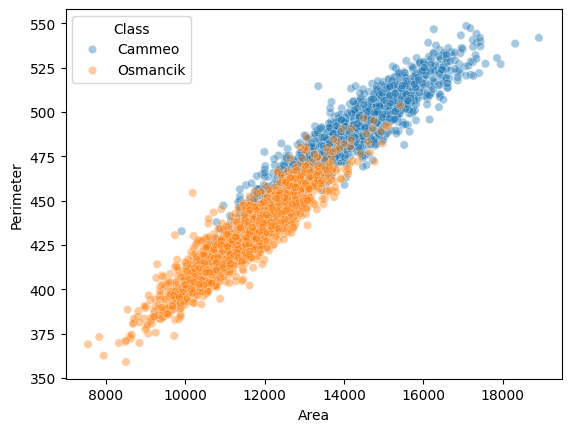

In [7]:
sns.scatterplot(x="Area", y="Perimeter", data=df, hue="Class", alpha=0.4)

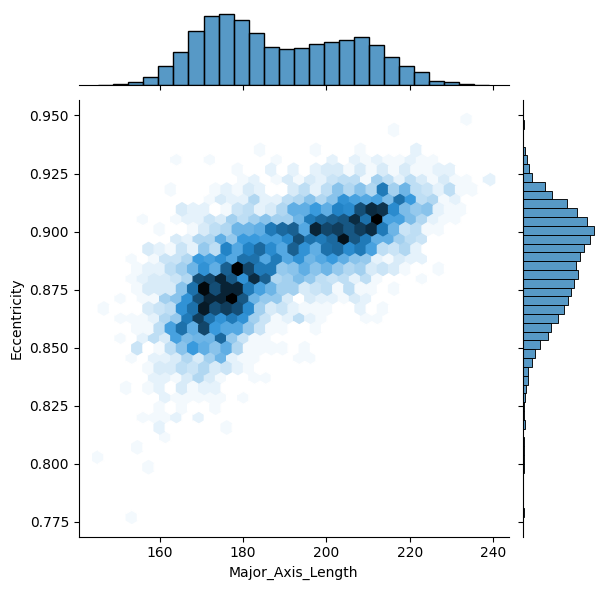

In [8]:
sns.jointplot(kind="hex", x="Major_Axis_Length", y="Eccentricity", data=df)


<Axes: xlabel='Class', ylabel='Extent'>

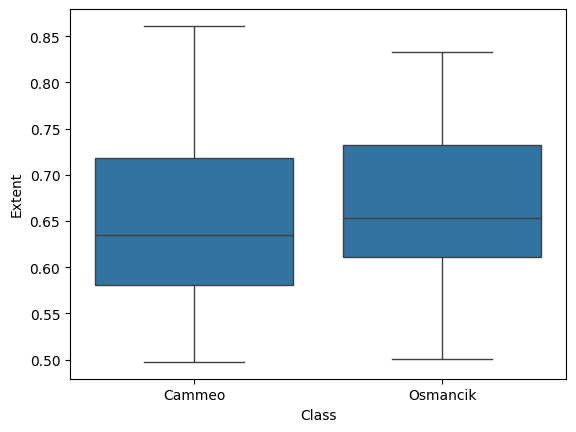

In [9]:
sns.boxplot(x="Class", y="Extent", data=df)

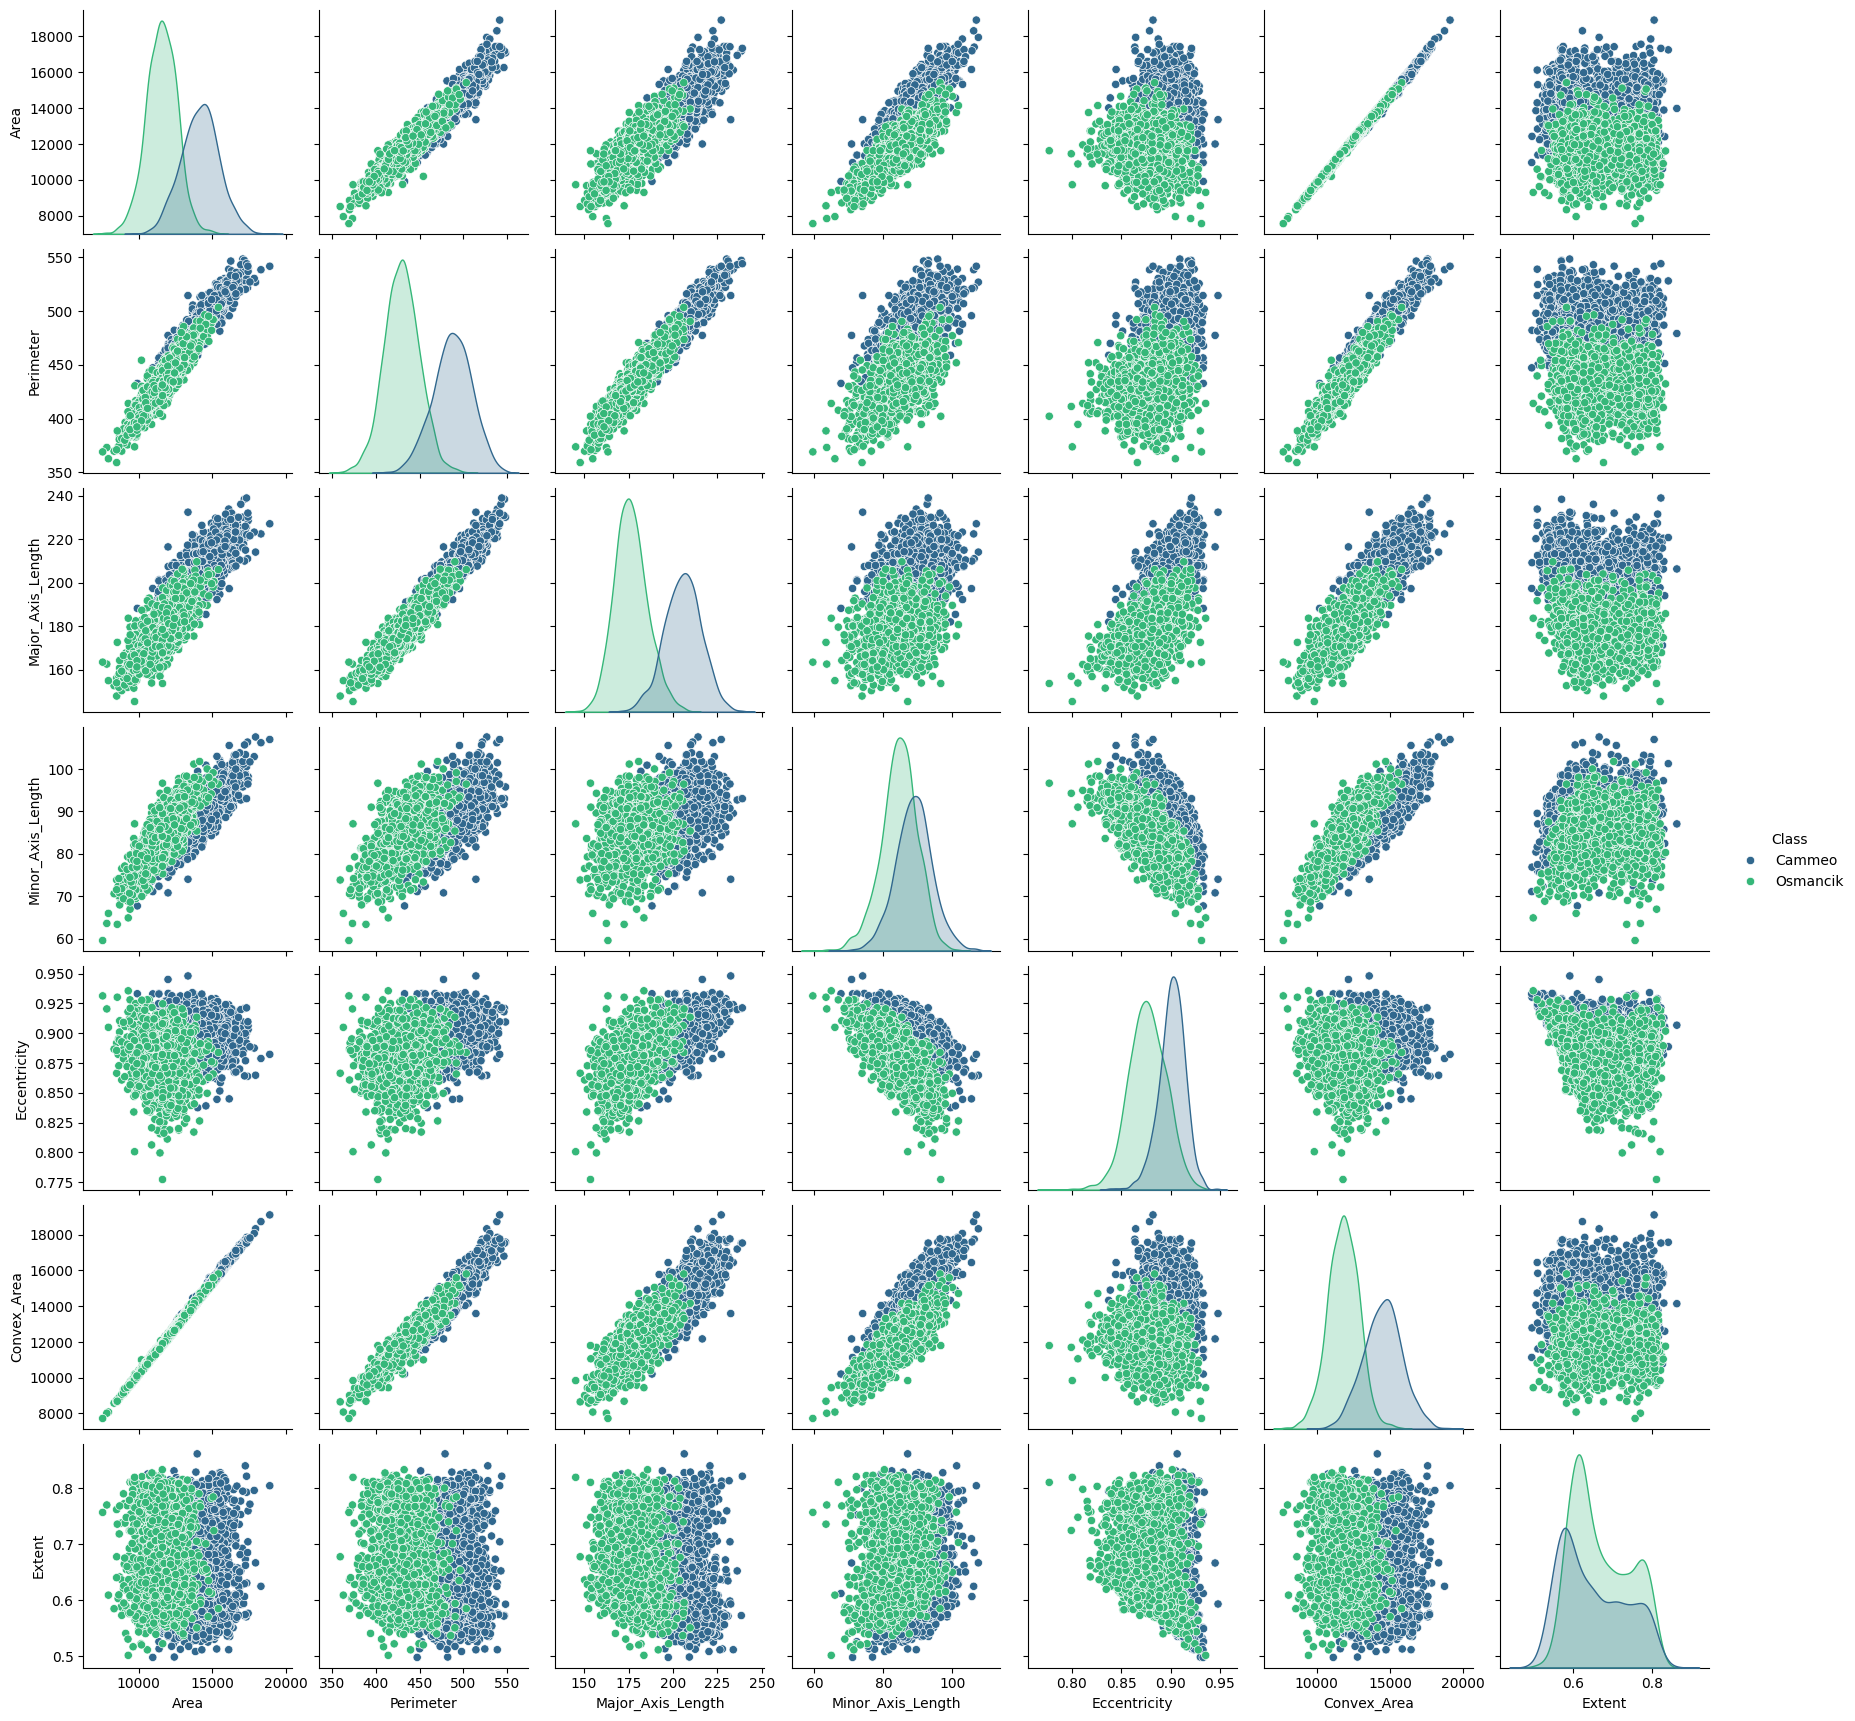

In [10]:
sns.pairplot(df, hue="Class", palette="viridis")

In [14]:
numeric_df = df.select_dtypes(include=[np.number])

<Axes: >

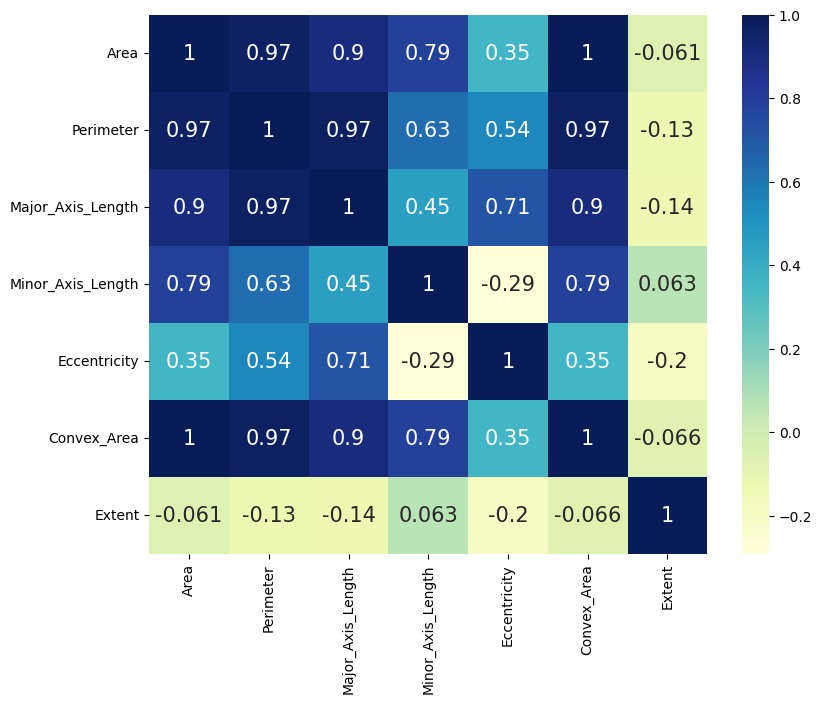

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(numeric_df.corr(), annot=True, annot_kws={"fontsize":15}, cmap=plt.cm.YlGnBu)

---
## Train Test Split

In [18]:
df = pd.read_excel("rice.xlsx")

In [19]:
X = df.drop("Class", axis=1)
y = pd.get_dummies(df["Class"], drop_first=True)

In [20]:
y

,Osmancik
0,False
1,False
2,False
3,False
4,False
...,...
3805,True
3806,True
3807,True
3808,True


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=9, test_size=0.1)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [24]:
n_est = [9,64,128,200] 
max_feat = [1,2,3,4] 
bootstrap_sec = [True, False] ## For every tree , it doesnt use whole X_test dataset.
oob = [True, False] ## add a distribution to our data for training it 


In [25]:
parameters= {
    "n_estimators" : n_est,
    "max_features" : max_feat,
    "bootstrap" : bootstrap_sec,
    "oob_score" : oob
}

In [26]:
random_forest = RandomForestClassifier()
grid = GridSearchCV(random_forest, parameters)

In [27]:
grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 64, 128, 200],
                         'oob_score': [True, False]})

In [28]:
grid.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=200)

In [29]:
grid.best_params_

{'bootstrap': True, 'max_features': 1, 'n_estimators': 200, 'oob_score': False}

In [30]:
rice_pred = grid.predict(X_test)

----
## Assessment

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [32]:
confusion_matrix(y_test, rice_pred)

array([[159,  23],
       [ 12, 187]])

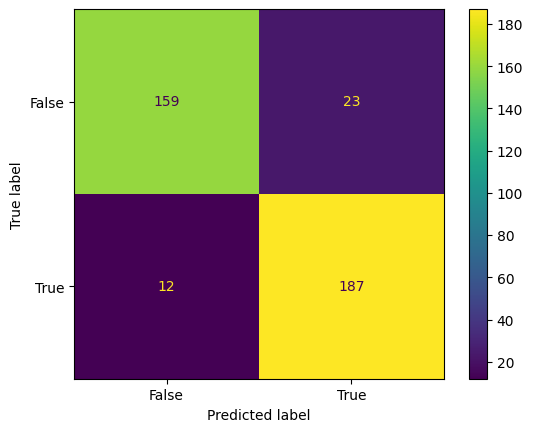

In [33]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

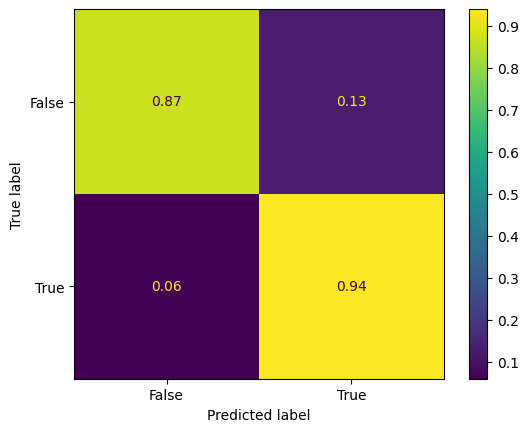

In [34]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, normalize="true")

In [36]:
print(classification_report(y_test,rice_pred))

              precision    recall  f1-score   support

       False       0.93      0.87      0.90       182
        True       0.89      0.94      0.91       199

    accuracy                           0.91       381
   macro avg       0.91      0.91      0.91       381
weighted avg       0.91      0.91      0.91       381



---
## About Estimator Number

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
tolerance = []
wrongChoice = []

for n in range(1, 128):
    rand_forest_class = RandomForestClassifier(n_estimators=n, bootstrap=True, max_features=1)
    rand_forest_class.fit(X_train, y_train)
    ricePreds = rand_forest_class.predict(X_test)
    error = 1 - accuracy_score(ricePreds, y_test)

    sample = y_test.to_numpy()
    sample = sample.reshape(1,-1)[0] 
    # y_test ve pirinc_preds'in türleri farklı olduğu için bu işlem yapıldı

    n_missed = np.sum(ricePreds != sample)
    tolerance.append(error)
    wrongChoice.append(n_missed)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

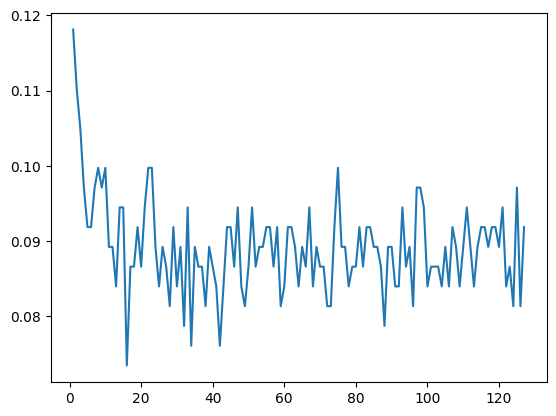

In [40]:
plt.plot(range(1,128), tolerance)

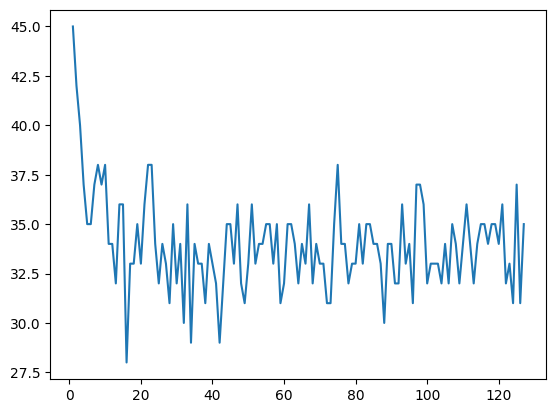

In [41]:
plt.plot(range(1,128), wrongChoice)